# Verifying command line examples

This notebook verifies that example scripts are executed correctly.

## Pairwise registration

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

from greedyfhist.utils.io import read_image

In [11]:
moving_img_path = '../pairwise_examples/images/moving_image.ome.tif'
moving_pointset_path = '../pairwise_examples/annotations/moving_pointset.csv'
fixed_img_path = '../pairwise_examples/images/fixed_image.ome.tif'

In [14]:
moving_img, _ = read_image(moving_img_path)
moving_pointset = pd.read_csv(moving_pointset_path)


fixed_img, _ = read_image(fixed_img_path)

(-0.5, 11197.5, 11914.5, -0.5)

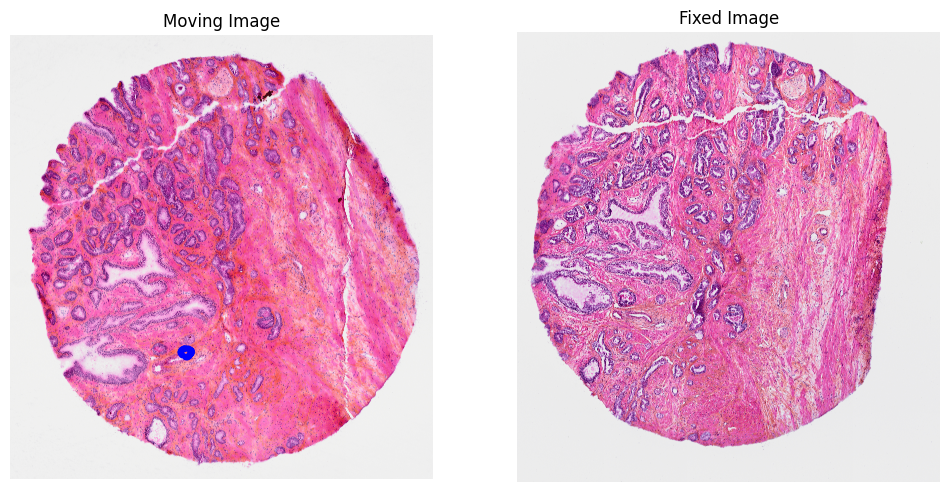

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(moving_img)
axs[0].set_title('Moving Image')
axs[0].axis('off')
axs[0].plot(moving_pointset.x, moving_pointset.y, 'b.')
axs[1].imshow(fixed_img)
axs[1].set_title('Fixed Image')
axs[1].axis('off')

## Check output pairwise registration

We transformed images twice: Once, included in the call to `greedyfhist register` and once afterwards in `greedyfhist transform`. We load both results and display them together.

In [18]:
first_warped_image, _ = read_image('out/transformed_data/moving_image.ome.tif')
first_warped_pointset = pd.read_csv('out/transformed_data/moving_pointset.csv')

second_warped_image, _ = read_image('pairwise-transform-example/transformed_data/moving_image.ome.tif')
second_warped_pointset = pd.read_csv('pairwise-transform-example/transformed_data/moving_pointset.csv')

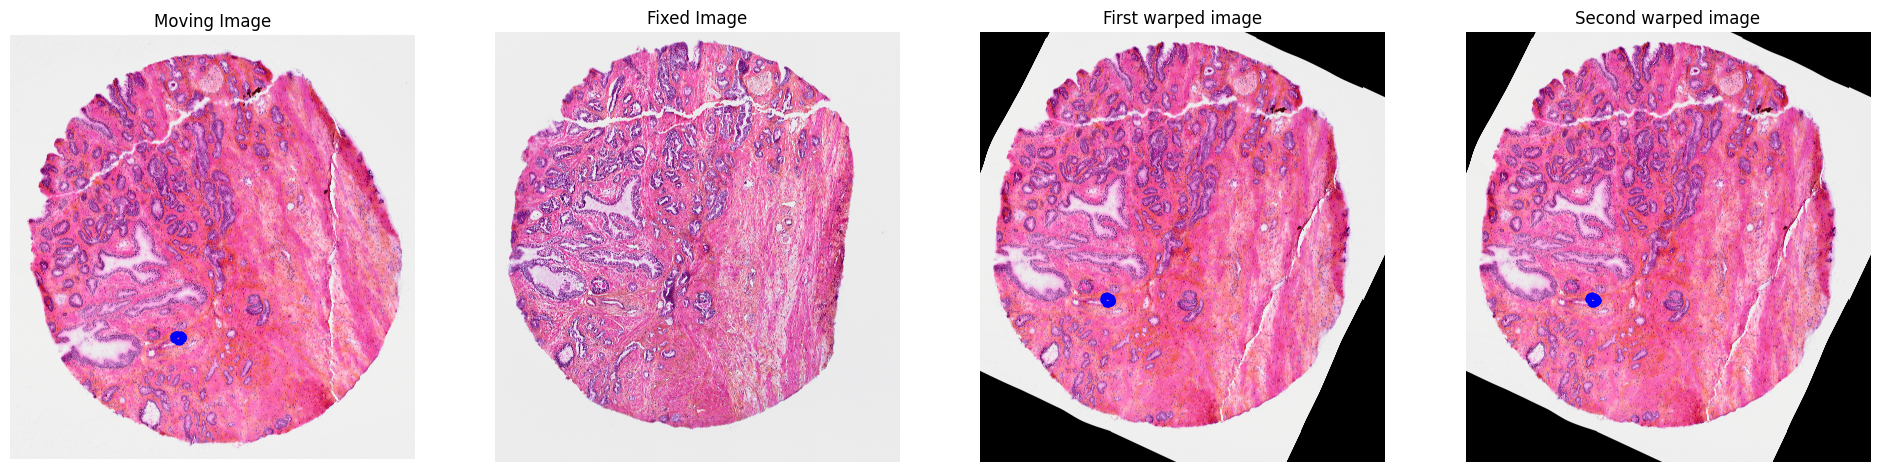

In [22]:
# Lets plot all results together
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
axs[0].imshow(moving_img)
axs[0].set_title('Moving Image')
axs[0].axis('off')
axs[0].plot(moving_pointset.x, moving_pointset.y, 'b.')
axs[1].imshow(fixed_img)
axs[1].set_title('Fixed Image')
axs[1].axis('off')
axs[2].imshow(first_warped_image)
axs[2].set_title('First warped image')
axs[2].axis('off')
axs[2].plot(first_warped_pointset.x, first_warped_pointset.y, 'b.')
axs[3].imshow(second_warped_image)
axs[3].set_title('Second warped image')
axs[3].axis('off')
axs[3].plot(second_warped_pointset.x, second_warped_pointset.y, 'b.')

### Check output of groupwise registration

Next we confirm the results of the groupwise registration. Requires that `example_groupwise_registration.sh` has be executed.

In [24]:
hes_img, _ = read_image('../groupwise_examples/hes.tif')
mts_img, _ = read_image('../groupwise_examples/mts.tif')
ihc_img, _ = read_image('../groupwise_examples/ihc.tif')

hes_ps = pd.read_csv('../groupwise_examples/hes_ps.csv')
mts_ps = pd.read_csv('../groupwise_examples/mts_ps.csv')
ihc_ps = pd.read_csv('../groupwise_examples/ihc_ps.csv')

(-0.5, 3063.5, 2856.5, -0.5)

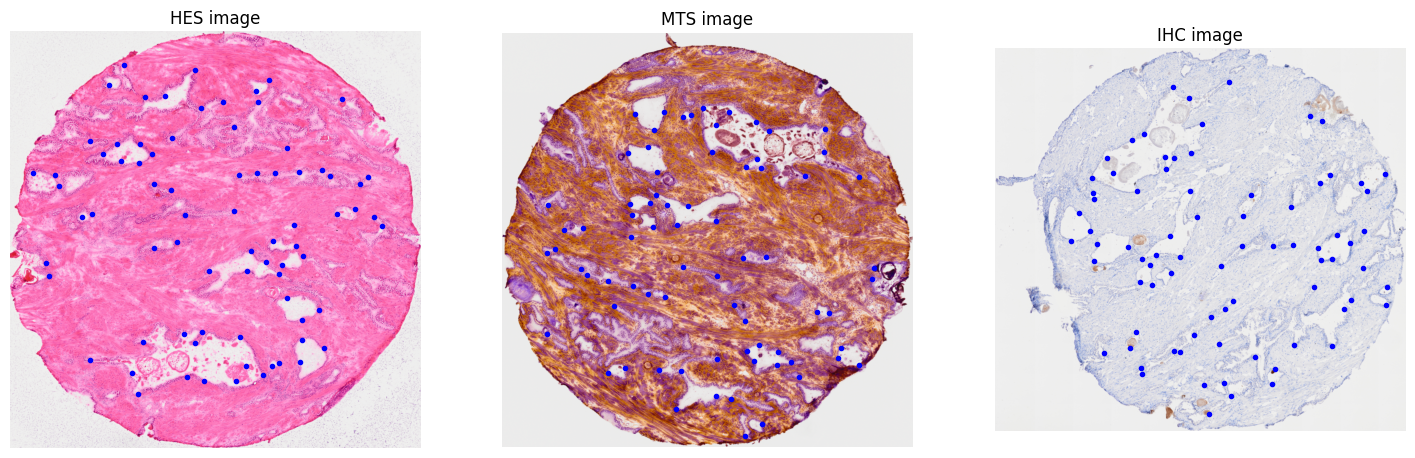

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(hes_img)
axs[0].plot(hes_ps.x, hes_ps.y, 'b.')
axs[0].set_title('HES image')
axs[0].axis('off')
axs[1].imshow(mts_img)
axs[1].plot(mts_ps.x, mts_ps.y, 'b.')
axs[1].set_title('MTS image')
axs[1].axis('off')
axs[2].imshow(ihc_img)
axs[2].plot(ihc_ps.x, ihc_ps.y, 'b.')
axs[2].set_title('IHC image')
axs[2].axis('off')


In [41]:
# Now look at the registered data (No pointsets for MTS staining available)

In [39]:
warped_hes_img, _ = read_image('group_out/section0/transformed_data/hes.ome.tif')
warped_ihc_img, _ = read_image('group_out/section1/transformed_data/mts.ome.tif')
warped_mts_img, _ = read_image('group_out/section2/transformed_data/ihc.ome.tif')

warped_hes_ps = pd.read_csv('group_out/section0/transformed_data/hes_ps.csv')
warped_ihc_ps = pd.read_csv('group_out/section1/transformed_data/mts_ps.csv')

(-0.5, 3063.5, 2856.5, -0.5)

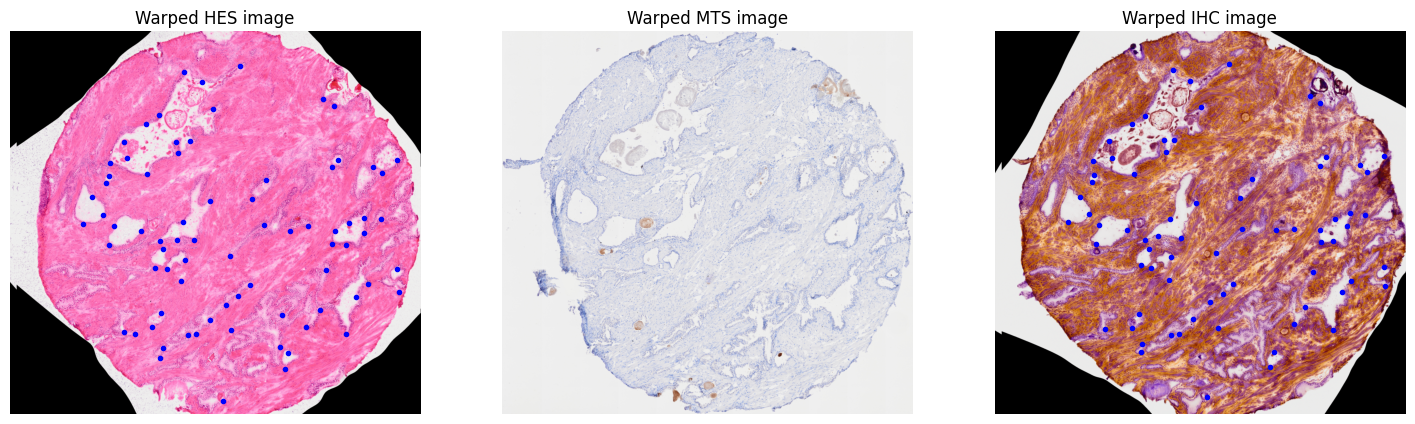

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(warped_hes_img)
axs[0].plot(warped_hes_ps.x, warped_hes_ps.y, 'b.')
axs[0].set_title('Warped HES image')
axs[0].axis('off')
axs[1].imshow(warped_mts_img)
axs[1].set_title('Warped MTS image')
axs[1].axis('off')
axs[2].imshow(warped_ihc_img)
axs[2].plot(warped_ihc_ps.x, warped_ihc_ps.y, 'b.')
axs[2].set_title('Warped IHC image')
axs[2].axis('off')